In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import tsfresh
from tsfresh.feature_extraction import extract_features, MinimalFCParameters, EfficientFCParameters
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from numpy import set_printoptions
from numpy.random import permutation
from sklearn.decomposition import PCA
from itertools import compress
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
direc = "E:\\WS4PD_data"
os.chdir(direc)
save_path = os.path.join(direc, "Figures", "Data_exploration", "GENEActiv_tremor")

In [3]:
# Load score data
score_file_path = os.path.join(direc, 'Feature_extraction','score_by_device.pkl')
df_score = pd.read_pickle(score_file_path)

In [4]:
print(df_score.shape)
df_score.head()

(6909, 11)


,subject_id,visit,session,task_code,repetition,tremor_GENEActivHand,tremor_PebbleHand,dyskinesia_GENEActivHand,dyskinesia_PebbleHand,bradykinesia_GENEActivHand,bradykinesia_PebbleHand
0,3_BOS,1,1,stndg,1,0,0,Yes,Yes,NotApplicable,NotApplicable
1,3_BOS,1,1,wlkgs,1,0,0,Yes,Yes,No,No
2,3_BOS,1,1,wlkgc,1,0,0,Yes,Yes,No,No
3,3_BOS,1,1,strsu,1,0,0,Yes,No,No,No
4,3_BOS,1,1,strsd,1,0,0,No,Yes,No,No


In [ ]:
# Dyskinesia score distribution
device_hand = ['dyskinesia_GENEActivHand', 'dyskinesia_PebbleHand']
fig, axs = plt.subplots(figsize=(5,10),nrows=2, ncols=1)
for i, hand in enumerate(device_hand):
    score = df_score[hand]
    axs[i].hist(score, histtype='bar', color = 'grey')
    axs[i].set_ylabel('Count')
    axs[i].set_xticks([0,1])
    axs[i].set_title(hand)

# save figure
plt.savefig(os.path.join(save_path,"Dyskinesia_distribution_device"))

In [ ]:
# Tremor score distribution
device_hand = ['tremor_GENEActivHand', 'tremor_PebbleHand']
fig, axs = plt.subplots(figsize=(5,10),nrows=2, ncols=1)
for i, hand in enumerate(device_hand):
    score = df_score[hand].astype(int)
    axs[i].hist(score, histtype='bar', color = 'grey', density = True,
                bins=np.arange(min(score), max(score) + 1, 1))
    axs[i].set_xlabel('Tremor score')
    axs[i].set_ylabel('Ratio')
    axs[i].set_xticks([0,1,2,3,4])
    axs[i].set_title(hand)

# save figure
plt.savefig(os.path.join(save_path,"Tremor_score_distribution_device"))

In [5]:
# load feature data
subject_ids = df_score.subject_id.unique()
df_feature = pd.DataFrame()
device = 'GENEActiv'
for sb in subject_ids:
    feature_file_path = os.path.join(direc,'Feature_extraction',device,sb + '_features.pkl')
    df_feature_sb = pd.read_pickle(feature_file_path)
    df_feature = pd.concat([df_feature,df_feature_sb])
df_feature = df_feature.reset_index(drop=True)

In [6]:
print(df_feature.shape)
df_feature.head()

(6909, 2262)


variable,x__abs_energy,x__absolute_sum_of_changes,"x__agg_autocorrelation__f_agg_""mean""__maxlag_40","x__agg_autocorrelation__f_agg_""median""__maxlag_40","x__agg_autocorrelation__f_agg_""var""__maxlag_40","x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,z__symmetry_looking__r_0.9,z__symmetry_looking__r_0.9500000000000001,z__time_reversal_asymmetry_statistic__lag_1,z__time_reversal_asymmetry_statistic__lag_2,z__time_reversal_asymmetry_statistic__lag_3,z__value_count__value_-1,z__value_count__value_0,z__value_count__value_1,z__variance,z__variance_larger_than_standard_deviation
0,1679.603735,473.44306,0.095873,0.095139,0.034345,-0.855854,0.638863,0.015026,0.001439,-0.935256,...,1.0,1.0,0.006316,-0.000659,0.001838,0.0,0.0,0.0,0.136844,0.0
1,19055.256439,2362.42439,0.038591,-0.004983,0.028837,4.885473,-0.091550,-0.005762,0.004986,7.876297,...,1.0,1.0,-0.165026,-0.095387,1.166803,0.0,0.0,0.0,5.575244,1.0
2,33997.391324,2518.52331,0.058391,0.043360,0.029279,5.536114,0.213840,0.014816,0.005384,9.103860,...,1.0,1.0,0.335137,1.718440,3.144522,0.0,0.0,0.0,5.171290,1.0
3,24346.128905,2055.18288,0.193572,0.113912,0.056743,3.015779,-0.022263,-0.001506,0.005141,6.264023,...,1.0,1.0,-0.044145,-0.308346,-0.888829,0.0,0.0,0.0,4.766660,1.0
4,114238.864428,3287.80973,0.193583,0.185587,0.003754,-1.436621,-0.326126,-0.020166,0.003871,5.432917,...,1.0,1.0,-14.781696,-6.498899,-7.256898,0.0,0.0,0.0,8.103196,1.0


# Upsampling

array([4677, 1531,  558,  132,   11], dtype=int64)

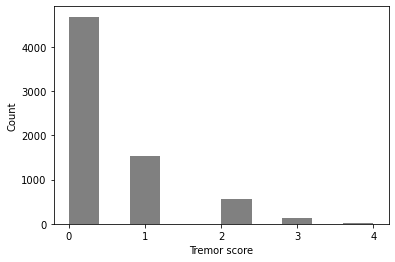

In [7]:
# Get scores
score = df_score['tremor_GENEActivHand'].values
score = np.array(score, dtype=float)
# score distribution
counts, bin_edges = np.histogram(score,bins = range(6))
fig, ax = plt.subplots()
ax.hist(score, histtype='bar', color = 'grey')
ax.set_xlabel('Tremor score')
ax.set_ylabel('Count')
ax.set_xticks([0,1,2,3,4])
# save figure
# plt.savefig(os.path.join(save_path,"Tremor_score_distribution"))
counts

In [8]:
# Merge score 3 and 4
score[score==4] = 3
df_score[df_score['tremor_GENEActivHand']==4]=3

In [9]:
# Upsampling by copying minority class instances

upsampled_df_feature = pd.DataFrame()
upsampled_df_score = pd.DataFrame()
upsample_size = 300
# upsample_size = round(max(counts)/2)
for c,s in zip(counts[0:4],range(4)):
    
    if s == 3:
        df_feature_group = df_feature.loc[score==s]
        df_score_group = df_score.loc[score==s]
        idx_list = df_feature_group.index.tolist()
        resample_idx = resample(idx_list, replace=True, n_samples=upsample_size, random_state=27)
        upsampled_feature_group = df_feature_group.loc[resample_idx]
        upsampled_score_group = df_score_group.loc[resample_idx]
    else:
        upsampled_feature_group = df_feature.loc[score==s]
        upsampled_score_group = df_score.loc[score==s]
        
#     if c == max(counts):
#         upsampled_feature_group = df_feature.loc[score==s]
#         upsampled_score_group = df_score.loc[score==s]
#     else:
#         df_feature_group = df_feature.loc[score==s]
#         df_score_group = df_score.loc[score==s]
#         idx_list = df_feature_group.index.tolist()
#         resample_idx = resample(idx_list, replace=True, n_samples=upsample_size, random_state=27)
#         upsampled_feature_group = df_feature_group.loc[resample_idx]
#         upsampled_score_group = df_score_group.loc[resample_idx]

    upsampled_df_feature = pd.concat([upsampled_df_feature, upsampled_feature_group])
    upsampled_df_score = pd.concat([upsampled_df_score, upsampled_score_group])

    
upsampled_df_feature = upsampled_df_feature.reset_index(drop=True)
upsampled_df_score = upsampled_df_score.reset_index(drop=True)
   
print('upsampled features:' + str(upsampled_df_feature.shape))
print('upsampled scores:' + str(upsampled_df_score.shape))

# Try other upsmapling methods:
# from imblearn.over_sampling import SMOTE


upsampled features:(7066, 2262)
upsampled scores:(7066, 11)


In [10]:
# Try different task categories
# task categories
task_groups = [['stndg', 'sittg'],['wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd'],
               ['ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng'],
              ['stndg', 'sittg', 'wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd',
              'ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng']]
task_group_names = ['no_voluntary_movement','whole_body_movement', 'upperlimb_movement', 'all']

In [11]:
# Train/Validation/Test datasets

# train:validation:test = 0.5:0.25:0.25
sb_train = ['6_BOS', '16_BOS', '7_NYC', '14_BOS', '8_NYC', '5_BOS', '12_NYC', '6_NYC', '17_BOS',
           '4_BOS', '11_BOS', '10_BOS', '15_BOS', '4_NYC', '11_NYC']
sb_val = ['8_BOS', '18_BOS', '2_NYC', '9_NYC', '3_BOS', '9_BOS']
sb_test = ['19_BOS', '3_NYC', '7_BOS', '5_NYC', '13_BOS', '10_NYC', '12_BOS']


In [12]:
# Train/Test Split
is_train = upsampled_df_score['subject_id'].isin(sb_train).tolist()
is_val = upsampled_df_score['subject_id'].isin(sb_val).tolist()
is_test = upsampled_df_score['subject_id'].isin(sb_test).tolist()

df_feature_train = upsampled_df_feature[is_train]
df_score_train = upsampled_df_score[is_train]
df_feature_val = upsampled_df_feature[is_val]
df_score_val = upsampled_df_score[is_val]
df_feature_test = upsampled_df_feature[is_test]
df_score_test = upsampled_df_score[is_test]

In [13]:
# Hyperparameter tuning
# hyper = [30, 50, 100, 150 , 200] #- choose 100
# nPC = [3, 10, 30, 50, 100]- choose 30
# tree_depth = [None, 2, 5 , 10]- choose None max_depth
# tree_number = [30, 50, 100, 200, 300]- doesn't matter, use default 100 n_estimators
# criterion_algo = ['gini', 'entropy'] - doesn't matter, use default gini criterion
# min_samples_split = [2, 5, 10, 20] - doesn't matter, use default 2 min_samples_split
# max_features = ['sqrt', 'log2', None] - doesn't matter, use default sqrt max_features

# hyper = ['sqrt', 'log2', None] # max_features
# accuracy = np.zeros([len(hyper),len(task_groups)])
accuracy = np.zeros([1,len(task_groups)])
for t,task,task_name in zip(range(len(task_groups)),task_groups, task_group_names):
    is_tasks = upsampled_df_score['task_code'].isin(task).tolist()
    df_feature_task = upsampled_df_feature[is_tasks]
    df_score_task = upsampled_df_score[is_tasks]
    
    # Remove features with nan
    df_feature2 = df_feature_task.dropna(axis=1)
    
    # Remove features with zero variance
    sel = VarianceThreshold(threshold=0.0001)
    df_feature3 = sel.fit_transform(df_feature2)
    filter3 = sel.get_support()
    feature_names2 = df_feature2.columns
    feature_names3 = feature_names2[filter3]
    df_feature3 = pd.DataFrame(df_feature3, columns=feature_names3)
    
    # Get scores
    score = df_score_task['tremor_GENEActivHand'].values
    score = np.array(score, dtype=float)

#     for i,d in zip(range(len(hyper)), hyper):
        # Univariate Selection
    test = SelectKBest(score_func=f_classif, k=100)
    df_feature4 = test.fit_transform(df_feature3, score)
    filter4 = test.get_support()
    feature_names4 = feature_names3[filter4]
    df_feature4 = pd.DataFrame(df_feature4, columns=feature_names4)

    # PCA
    X=df_feature4.values
    pca = PCA(n_components=30)
    X_new = pca.fit_transform(X)

    # Random Forest
    # Tuning hyperparameters
    # train/validation split
    is_train_task = list(compress(is_train,is_tasks))
    is_val_task = list(compress(is_val,is_tasks))
    X_train = X_new[is_train_task,:]
    y_train = score[is_train_task]
    X_val = X_new[is_val_task,:]
    y_val = score[is_val_task]

    #     for i,d in zip(range(len(hyper)), hyper):
    clf = RandomForestClassifier(max_depth = None, random_state=0)
    clf.fit(X_train, y_train)
    model_accuracy = round(clf.score(X_val, y_val)*100,1)
    accuracy[0][t] = model_accuracy


In [14]:
accuracy = pd.DataFrame(data=accuracy, columns=task_group_names)
accuracy

,no_voluntary_movement,whole_body_movement,upperlimb_movement,all
0,66.7,75.1,62.8,67.6


# No up- or down- sampling

In [ ]:
# Try different task categories
# task categories
task_groups = [['stndg', 'sittg'],['wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd'],
               ['ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng'],
              ['stndg', 'sittg', 'wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd',
              'ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng']]
task_group_names = ['no_voluntary_movement','whole_body_movement', 'upperlimb_movement', 'all']

In [ ]:
# Train/Validation/Test datasets

# train:validation:test = 0.5:0.25:0.25
sb_train = ['6_BOS', '16_BOS', '7_NYC', '14_BOS', '8_NYC', '5_BOS', '12_NYC', '6_NYC', '17_BOS',
           '4_BOS', '11_BOS', '10_BOS', '15_BOS', '4_NYC', '11_NYC']
sb_val = ['8_BOS', '18_BOS', '2_NYC', '9_NYC', '3_BOS', '9_BOS']
sb_test = ['19_BOS', '3_NYC', '7_BOS', '5_NYC', '13_BOS', '10_NYC', '12_BOS']

In [ ]:
# Train/Test Split
is_train = df_score['subject_id'].isin(sb_train).tolist()
is_val = df_score['subject_id'].isin(sb_val).tolist()
is_test = df_score['subject_id'].isin(sb_test).tolist()

df_feature_train = df_feature[is_train]
df_score_train = df_score[is_train]
df_feature_val = df_feature[is_val]
df_score_val = df_score[is_val]
df_feature_test = df_feature[is_test]
df_score_test = df_score[is_test]

In [ ]:
# Hyperparameter tuning
# kbest = [30, 50, 100, 150 , 200]- choose 100
# nPC = [3, 10, 30, 50, 100]- choose 30
# tree_depth = [None, 2, 5 , 10]- choose None max_depth
# tree_number = [30, 50, 100, 200, 300]- doesn't matter, use default 100 n_estimators
# criterion_algo = ['gini', 'entropy'] - doesn't matter, use default gini criterion
# min_samples_split = [2, 5, 10, 20] - doesn't matter, use default 2 min_samples_split
# max_features = ['sqrt', 'log2', None] - doesn't matter, use default sqrt max_features

# hyper = ['sqrt', 'log2', None] # max_features
# accuracy = np.zeros([len(hyper),len(task_groups)])
accuracy = np.zeros([1,len(task_groups)])

for t,task,task_name in zip(range(len(task_groups)),task_groups, task_group_names):
    is_tasks = df_score['task_code'].isin(task).tolist()
    df_feature_task = df_feature[is_tasks]
    df_score_task = df_score[is_tasks]
    
    # Remove features with nan
    df_feature2 = df_feature_task.dropna(axis=1)
    
    # Remove features with zero variance
    sel = VarianceThreshold(threshold=0.0001)
    df_feature3 = sel.fit_transform(df_feature2)
    filter3 = sel.get_support()
    feature_names2 = df_feature2.columns
    feature_names3 = feature_names2[filter3]
    df_feature3 = pd.DataFrame(df_feature3, columns=feature_names3)
    
    # Get scores
    score = df_score_task['dyskinesia_PebbleHand']
#     score = df_score_task['tremor_GENEActivHand'].values
#     score = np.array(score, dtype=float)
    
#     Merge score 3 and 4
#     score[score==4] = 3
    
    # Univariate Selection
    test = SelectKBest(score_func=f_classif, k=100)
    df_feature4 = test.fit_transform(df_feature3, score)
    filter4 = test.get_support()
    feature_names4 = feature_names3[filter4]
    df_feature4 = pd.DataFrame(df_feature4, columns=feature_names4)
    
    # PCA
    X=df_feature4.values
    pca = PCA(n_components=30)
    X_new = pca.fit_transform(X)

    # Random Forest
    # Tuning hyperparameters
    # train/validation split
    is_train_task = list(compress(is_train,is_tasks))
    is_val_task = list(compress(is_val,is_tasks))
    X_train = X_new[is_train_task,:]
    y_train = score[is_train_task]
    X_val = X_new[is_val_task,:]
    y_val = score[is_val_task]
    
#     for i,d in zip(range(len(hyper)), hyper):
    clf = RandomForestClassifier(max_depth = None, random_state=0)
    clf.fit(X_train, y_train)
    model_accuracy = round(clf.score(X_val, y_val)*100,1)
#     accuracy[i][t] = model_accuracy
    accuracy[0][t] = model_accuracy


In [ ]:
accuracy = pd.DataFrame(data=accuracy, columns=task_group_names)
accuracy

In [ ]:
accuracy = np.zeros([1,len(task_groups)])

for t,task,task_name in zip(range(len(task_groups)),task_groups, task_group_names):
    is_tasks = df_score['task_code'].isin(task).tolist()
    df_feature_task = df_feature[is_tasks]
    df_score_task = df_score[is_tasks]
    
    # Remove features with nan
    df_feature2 = df_feature_task.dropna(axis=1)
    
    # Remove features with zero variance
    sel = VarianceThreshold(threshold=0.0001)
    df_feature3 = sel.fit_transform(df_feature2)
    filter3 = sel.get_support()
    feature_names2 = df_feature2.columns
    feature_names3 = feature_names2[filter3]
    df_feature3 = pd.DataFrame(df_feature3, columns=feature_names3)
    
    # Get scores
    score = df_score_task['tremor_PebbleHand'].values
    score = np.array(score, dtype=float)
    
    # Merge score 3 and 4
    score[score==4] = 3
    
    # Univariate Selection
    test = SelectKBest(score_func=f_classif, k=100)
    df_feature4 = test.fit_transform(df_feature3, score)
    filter4 = test.get_support()
    feature_names4 = feature_names3[filter4]
    df_feature4 = pd.DataFrame(df_feature4, columns=feature_names4)
    
    # PCA
    X=df_feature4.values
    pca = PCA(n_components=30)
    X_new = pca.fit_transform(X)

    # Random Forest
    # Tuning hyperparameters
    # train/test split
    is_train_task = list(compress(is_train,is_tasks))
    is_test_task = list(compress(is_test,is_tasks))
    X_train = X_new[is_train_task,:]
    y_train = score[is_train_task]
    X_test = X_new[is_test_task,:]
    y_test = score[is_test_task]
    
#     for i,d in zip(range(len(hyper)), hyper):
    clf = RandomForestClassifier(max_depth = None, random_state=0)
    clf.fit(X_train, y_train)
    model_accuracy = round(clf.score(X_test, y_test)*100,1)
#     accuracy[i][t] = model_accuracy
    accuracy[0][t] = model_accuracy

In [ ]:
accuracy = pd.DataFrame(data=accuracy, columns=task_group_names)
accuracy

# Draft

In [ ]:
for task,task_name in zip(task_groups, task_group_names):
    is_tasks = df_score['task_code'].isin(task).tolist()
    df_feature_task = df_feature[is_tasks]
    df_score_task = df_score[is_tasks]
    
    # Remove features with nan
    df_feature2 = df_feature_task.dropna(axis=1)
    
    # Remove features with zero variance
    sel = VarianceThreshold(threshold=0.0001)
    df_feature3 = sel.fit_transform(df_feature2)
    filter3 = sel.get_support()
    feature_names2 = df_feature2.columns
    feature_names3 = feature_names2[filter3]
    df_feature3 = pd.DataFrame(df_feature3, columns=feature_names3)

    
    # Univariate Selection
    test = SelectKBest(score_func=f_classif, k=50)
    df_feature4 = test.fit_transform(df_feature3, score)
    filter4 = test.get_support()
    feature_names4 = feature_names3[filter4]
    df_feature4 = pd.DataFrame(df_feature4, columns=feature_names4)
    
    # PCA
    X=df_feature3.values
    pca = PCA(n_components=10)
    fit = pca.fit(X)
    cumulative_EV = np.cumsum(fit.explained_variance_ratio_)
    
    X_new = pca.fit_transform(X)
    PC1 = X_new[:,0]
    x = PC1
    y = score
    fig, ax = plt.subplots()
    ax.scatter(x,y,facecolors='none', edgecolors='b')
    ax.set_xlabel('PC1' + '(' + str(round(cumulative_EV[0],2)*100) + '%)')
    ax.set_ylabel('Tremor score')
    ax.set_yticks([0,1,2,3])
    ax.set_yticklabels(['0','1','2','3/4'])
    ax.set_title(task_name)
    
    # save figure
    file_name = 'PC1' + '_' + task_name
    plt.savefig(os.path.join(save_path,'PCA_50', file_name))

In [ ]:
# subjects in the training dataset
# train:test = 0.67:0.33
# sb_train = ['11_NYC', '6_BOS', '8_BOS', '2_NYC', '7_NYC', '5_BOS', '11_BOS', '15_BOS', '4_NYC',
#                 '12_NYC', '6_NYC', '3_BOS', '14_BOS', '18_BOS', '9_NYC', '4_BOS', '9_BOS', '16_BOS']

# # train:test = 0.75:0.25
# sb_train = ['8_BOS', '11_NYC', '2_NYC', '9_NYC', '3_BOS', '8_NYC', '7_NYC', '18_BOS', '15_BOS',
#            '4_NYC', '12_NYC', '9_BOS', '6_NYC', '6_BOS', '16_BOS', '5_BOS', '14_BOS', '4_BOS',
#            '11_BOS', '10_BOS', '17_BOS']
# is_test_sb = ~np.isin(subject_ids, sb_train)
# sb_test = subject_ids[is_test_sb]

In [ ]:
# Remove features with nan
df_feature2 = df_feature.dropna(axis=1)

# Remove features with zero variance
sel = VarianceThreshold()
df_feature3 = sel.fit_transform(df_feature2)
filter3 = sel.get_support()
feature_names2 = df_feature2.columns
feature_names3 = feature_names2[filter3]
df_feature3 = pd.DataFrame(df_feature3, columns=feature_names3)

# Get scores
score = df_score['tremor_GENEActivHand'].values
score = np.array(score, dtype=float)

# Merge score 3 and 4
score[score==4] = 3

# Univariate Selection
test = SelectKBest(score_func=f_classif, k=100)
df_feature4 = test.fit_transform(df_feature3, score)
filter4 = test.get_support()
feature_names4 = feature_names3[filter4]
df_feature4 = pd.DataFrame(df_feature4, columns=feature_names4)

# PCA
X=df_feature4.values
pca = PCA(n_components=10)
X_new = pca.fit_transform(X)
PC1 = X_new[:,0]


In [ ]:
PC1.shape

In [ ]:
X_train = X_new[is_train,0:3]
y_train = score[is_train]
X_test = X_new[is_test,0:3]
y_test = score[is_test]

In [ ]:
# Random forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
hyper

In [ ]:
model_accuracy

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0,  oob_score=True)
clf.fit(X_train, y_train)
model_accuracy_train = round(clf.oob_score_,3)*100
model_accuracy_test = round(clf.score(X_test, y_test),3)*100
